In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sktime as sk

In [2]:
#Import de sklearn
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
Holidays_events = pd.read_csv("holidays_events.csv")
Oil = pd.read_csv("oil.csv")
Sample_submission = pd.read_csv("sample_submission.csv")
Stores = pd.read_csv("stores.csv")
Test = pd.read_csv("test.csv")
Train = pd.read_csv("train.csv")
Transactions = pd.read_csv("transactions.csv")

<Axes: xlabel='date', ylabel='Count'>

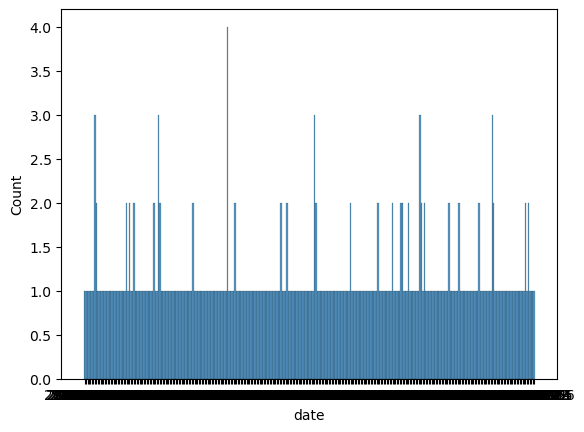

In [14]:
sns.histplot(Holidays_events['date'])

In [6]:
Oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [7]:
Sample_submission

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


In [8]:
Stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15
